In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [14]:
#file1은 기자들과 파월의 기자회견 내용, file2는 파월의 연설 내용 입니다.

file1_path = '/content/drive/MyDrive/Colab Notebooks/파월 기자회견 분석(금리 발표)/fomc press conference, 23.12.13.txt'
file2_path = '/content/drive/MyDrive/Colab Notebooks/파월 기자회견 분석(금리 발표)/press conference introductory statement 23.12.13.txt'

with open(file1_path, 'r', encoding='utf-8') as file1, open(file2_path, 'r', encoding='utf-8') as file2:
    content1 = file1.read()
    content2 = file2.read()

print(f"파일 1 내용:\n{content1}\n")
print(f"파일 2 내용:\n{content2}\n")


파일 1 내용:
thank you Chris rugaber at uh Associated Press I wanted to ask how should we
interpret the addition of the word any uh before additional firming in the statement I mean does that mean that
you're pretty much done with rate hikes and the committee has shifted away from a tightening bias and to a more neutral
stance thank you
so um specifically on on any um we do say that in determining the extent of
any additional policy firming that may be appropriate so any additional policy firming that sentence so we added the
word any as an acknowledgement that we believe that we are likely at or near the uh the peak rate for this cycle um
participants didn't write down additional hikes that we believe are likely uh so uh that's what we wrote
down um but participants also uh didn't want to take the possibility of further
hikes off the table so that's really what we were
thinking chairman um oh the microphone sorry uh Steve Leeman CNBC happy
holidays Mr chairman um fed Governor Chris Waller

#파월 연설
##NLTK 모듈

In [15]:
#영문을 분석하기 위해 nltk모듈을 사용하였습니다.

import nltk

nltk.download('punkt')                          #토큰화
nltk.download('stopwords')                      #불용어 제거
nltk.download('averaged_perceptron_tagger')     #품사 태깅
nltk.download('wordnet')                        #표제어 추출

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

##전처리, 품사 태깅, 표제어 추출, 명사 추출

In [16]:
#우선 기자회견 전 파월의 연설 내용을 전처리 합니다.

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


file_path = '/content/drive/MyDrive/Colab Notebooks/파월 기자회견 분석(금리 발표)/press conference introductory statement 23.12.13.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

#토큰화
tokens = word_tokenize(text)

# 불용어 제거 및 철자가 2글자 이하인 단어 제외
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words and len(word) > 2]

# 품사 태깅
pos_tags = pos_tag(filtered_tokens)

# WordNet 품사 태그 변환 함수
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # 기본적으로 명사로 처리하도록 변경

# 표제어 추출(단어의 기본형으로 변환해서 불필요한 단어의 수를 줄이고 과거형, 진행형 이런거를 통일 합니다.)
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(pos)) for word, pos in pos_tags]

# 명사 추출(명사만 추출합니다. 동사, 형용사 등등 필요없는 품사는 뺍니다.)
nouns = [word for word, pos in pos_tags if pos.startswith('N')]

print(nouns)
print(lemmatized_words)


['afternoon', 'colleagues', 'mandate', 'promote', 'employment', 'prices', 'people', 'year', 'look', 'progress', 'mandate', 'objectives', 'inflation', 'highs', 'increase', 'unemployment', 'news', 'inflation', 'progress', 'bringing', 'look', 'year', 'people', 'inflation', 'goal', 'price', 'stability', 'achieve', 'period', 'labor', 'market', 'conditions', 'year', 'stance', 'policy', 'policy', 'interest', 'rate', 'percentage', 'points', 'securities', 'holdings', 'pace', 'actions', 'policy', 'rate', 'territory', 'policy', 'pressure', 'activity', 'inflation', 'effects', 'today', 'policy', 'interest', 'rate', 'continue', 'securities', 'holdings', 'uncertainties', 'risks', 'committee', 'decisions', 'policy', 'policy', 'totality', 'data', 'outlook', 'balance', 'risks', 'policy', 'briefly', 'developments', 'indicators', 'growth', 'activity', 'pace', 'quarter', 'track', 'expand', 'year', 'consumer', 'demand', 'supply', 'conditions', 'summer', 'activity', 'housing', 'sector', 'remains', 'levels', 

##워드클라우드

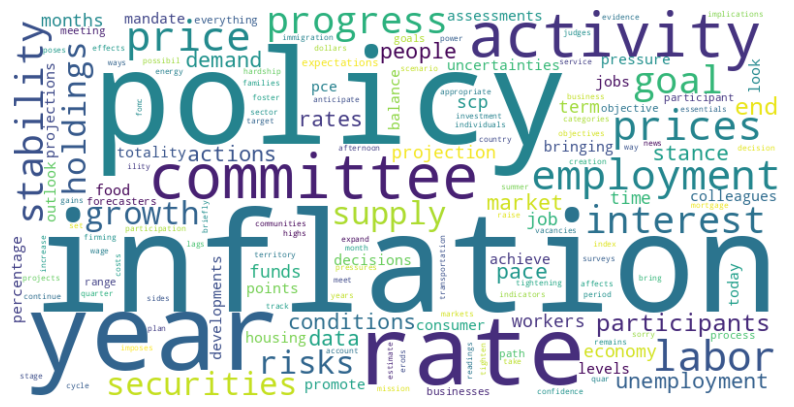

In [17]:
#토큰의 빈도수를 워드클라우드로 표현 합니다.

from wordcloud import WordCloud

# 빈도 분석
freq_dist = FreqDist(nouns)

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(freq_dist)

# 워드클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##막대그래프

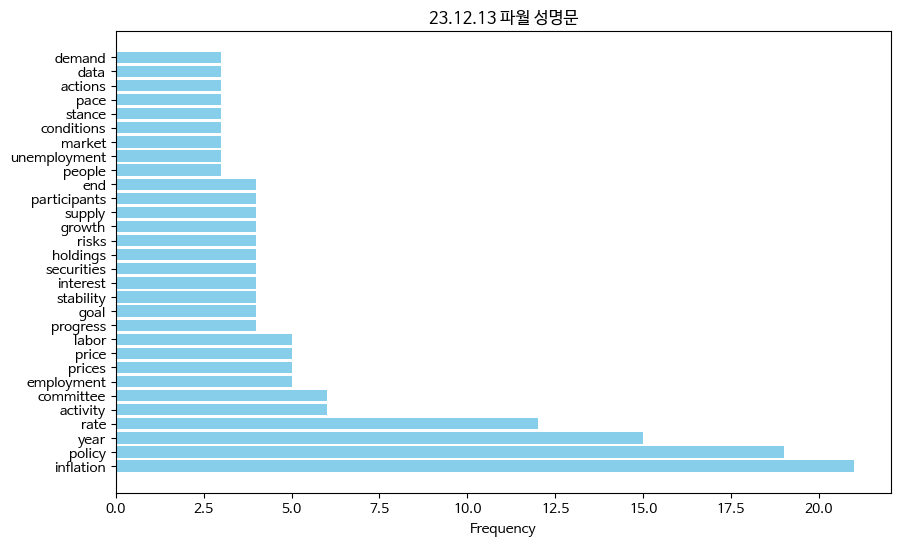

In [18]:
# 가로 막대 그래프 시각화 (높은 순서대로)
sorted_freq_dist = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
plt.barh([item[0] for item in sorted_freq_dist[:30]], [item[1] for item in sorted_freq_dist[:30]], color='skyblue')
plt.xlabel('Frequency')
plt.title('23.12.13 파월 성명문')
plt.show()


In [19]:
!pip install summa

In [20]:
#summa를 활용하여 회의록 전체를 요약한 내용 입니다.
#토큰화는 주제가 되는 단어, 핵심 단어를 보기 위함이고 회의록이 말하고자 하는 문맥의 흐름은 파악이 어렵기 때문에
#요약이 필요하다고 생각됩니다.

from summa import summarizer


file_path = '/content/drive/MyDrive/Colab Notebooks/파월 기자회견 분석(금리 발표)/press conference introductory statement 23.12.13.txt'


with open(file_path, 'r', encoding='utf-8') as file:
    meeting_text = file.read()

summary = summarizer.summarize(meeting_text, ratio=0.2)

print(summary)


objectives inflation has eased from its
news but inflation is still too high
inflation to our 2%
goal restoring price stability is
Pace our actions have moved our policy
and inflation and the full effects of
policy interest rate unchanged and to
continue to reduce our Securities
firming and how long policy will remain
projections committee participants
year the labor market remains tight but
supply and demand conditions continue to
year the unemployment rate remains low
rate has moved up since last year
inflation the median unemployment rate
from 3.8% at the end of this year to
year inflation has eased over the past
year but remains a above our longer run
build confidence that inflation is
longer term inflation expectations
inflation all the way to 2% will take
SCP is 2.8% this year Falls to 2.4% next
2026 the fed's monetary policy actions
maximum employment and stable prices for
are acutely aware that high inflation
returning inflation to our 2%
last year we have raised our policy rat

##요약

인플레이션은 완화되었지만 여전히 높음.
정책은 물가 안정을 회복하는 데 주력하고 있음.
정책에 따른 행동은 인플레이션 및 정책의 전체 효과에 영향을 미침.
정책 금리는 변경되지 않았으며 보유 중인 증권을 계속 축소할 것임.
노동 시장은 여전히 타이트하지만 공급과 수요 조건은 계속됨.
실업률은 낮지만 작년 이후 상승함.
인플레이션은 작년 이후 완화되었지만 장기적 목표보다 높음.
목표로 하는 2% 인플레이션까지 시간이 필요함.
노동 시장 및 물가 안정에 대한 경제 활동의 영향 지연됨.
인플레이션 기대가 잘 고정됨.
2% 인플레이션 목표에 도달하기 위한 적절한 조치를 취할 것임.

###분석
23.12.13일의 연설 내용 입니다. 물가의 상승으로 물가를 잡기 위해 금리를 많이 올렸었습니다. 그 결과 물가는 잡혔고 이 날 금리를 동결 시켰습니다.
inflation이 언급이 많은 걸로 보아 여전히 물가가 금리에 중요한 영향을 미치는 것을 알 수 있습니다.
그 밖에 unemployment, labor, growth, supply, demand 등을 보아 노동시장과 성장, 물가에 영향을 주는 수요와 공급 등도 신경을 쓴다는 것을 알수 있습니다.

#기자회견
##전처리, 품사 태깅, 표제어 추출, 명사 추출

In [21]:
#기자들과 파월의 기자회견 내용을 전처리 합니다.

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


# 파일 경로
file_path = '/content/drive/MyDrive/Colab Notebooks/파월 기자회견 분석(금리 발표)/fomc press conference, 23.12.13.txt'

# 파일 불러오기
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# 텍스트 토큰화
tokens = word_tokenize(text)

# 불용어 제거 및 철자가 2글자 이하인 단어 제외
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words and len(word) > 2]

# 품사 태깅
pos_tags = pos_tag(filtered_tokens)

# WordNet 품사 태그 변환 함수
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # 기본적으로 명사로 처리하도록 변경

# 표제어 추출
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(pos)) for word, pos in pos_tags]

# 명사 추출
nouns = [word for word, pos in pos_tags if pos.startswith('N')]

print(nouns)
print(lemmatized_words)


['thank', 'chris', 'rugaber', 'press', 'addition', 'word', 'firming', 'statement', 'mean', 'rate', 'hikes', 'committee', 'stance', 'thank', 'policy', 'firming', 'policy', 'sentence', 'word', 'acknowledgement', 'rate', 'cycle', 'participants', 'hikes', 'participants', 'possibility', 'hikes', 'chairman', 'microphone', 'sorry', 'leeman', 'cnbc', 'holidays', 'chairman', 'governor', 'chris', 'waller', 'inflation', 'months', 'interest', 'rates', 'fed', 'waller', 'fed', 'cut', 'rates', 'inflation', 'course', 'comment', 'officials', 'question', 'way', 'way', 'right', 'question', 'move', 'question', 'raise', 'policy', 'rate', 'question', 'people', 'hike', 'possibility', 'question', 'question', 'become', 'begin', 'amount', 'policy', 'restraint', 'place', 'question', 'people', 'growth', 'labor', 'market', 'balance', 'measures', 'inflation', 'things', 'see', 'ways', 'victory', 'progress', 'need', 'course', 'question', 'question', 'become', 'begin', 'amount', 'policy', 'restraint', 'place', 'view',

##워드클라우드

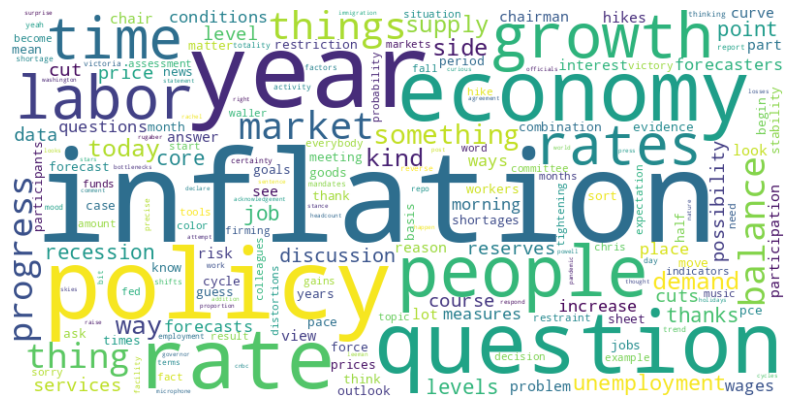

In [22]:
from wordcloud import WordCloud

# 빈도 분석
freq_dist = FreqDist(nouns)

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(freq_dist)

# 워드클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##막대그래프

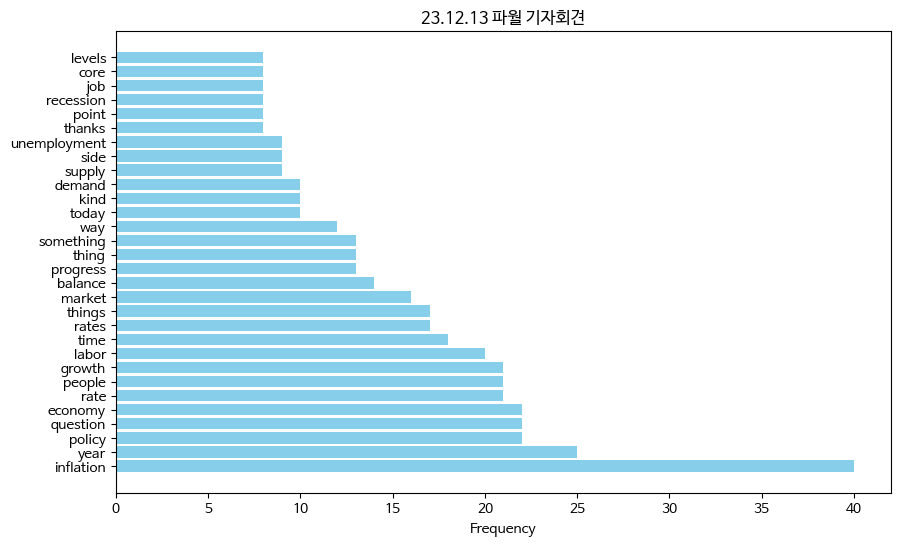

In [23]:
# 가로 막대 그래프 시각화 (높은 순서대로)
sorted_freq_dist = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
plt.barh([item[0] for item in sorted_freq_dist[:30]], [item[1] for item in sorted_freq_dist[:30]], color='skyblue')
plt.xlabel('Frequency')
plt.title('23.12.13 파월 기자회견')
plt.show()


In [24]:
#summa를 활용하여 회의록 전체를 요약한 내용 입니다.
#토큰화는 주제가 되는 단어, 핵심 단어를 보기 위함이고 회의록이 말하고자 하는 문맥의 흐름은 파악이 어렵기 때문에
#요약이 필요하다고 생각됩니다.

from summa import summarizer


file_path = '/content/drive/MyDrive/Colab Notebooks/파월 기자회견 분석(금리 발표)/fomc press conference, 23.12.13.txt'


with open(file_path, 'r', encoding='utf-8') as file:
    meeting_text = file.read()

summary = summarizer.summarize(meeting_text, ratio=0.2)

print(summary)


word any as an acknowledgement that we believe that we are likely at or near the uh the peak rate for this cycle um
down um but participants also uh didn't want to take the possibility of further
thinking chairman um oh the microphone sorry uh Steve Leeman CNBC happy
holidays Mr chairman um fed Governor Chris Waller said that if inflation continues to fall then the FED uh in the
the first question is how fast to move and we moved very fast the second question uh is um you know really uh how
high to raise the policy rate and that's really the question that we're still on here uh we're we're very focused on that
would just say this um we are seeing uh you know strong growth that is that is
seeing inflation making real progress these are the things we've been wanting to see we can't know uh we still have a
little basis for thinking that the economy is in a recession now um I would say that
I think there's there's always a probability uh that that there will be a recession in the next year

##요약
인플레이션 정점에 도달했을 가능성이 있으며 정책금리를 높일지 결정하는 것이 아직 논의 중이다.
경제는 강한 성장을 보이고 있으며 이는 인플레이션을 줄이는 데 도움이 되고 있다.
경제의 잠재성장률과 인플레이션에 대한 예측은 여전히 불확실하며 전반적인 데이터를 고려해야 한다.
통화정책은 경제 상황에 따라 조절될 것이며 인플레이션과 노동시장의 상태를 고려할 것이다.
경제의 발전과 인플레이션 감소에 따라 조심스럽게 움직일 것이지만 아직은 성공을 선언하기에는 이른 상태이다.
노동 시장의 상태와 인플레이션의 진전을 지켜보며 정책을 조정할 것이다.
재정정책과 통화정책의 조화로운 협력이 중요하며 경제의 변화에 따라 정책을 조정할 것이다.


###분석
기자회견 내용 입니다. 물가가 금리 변화의 중요한 요인인 것을 확인 할 수 있습니다.
연설에서도 나오고 기자회견에서도 자주 등장한 unemployment, growth, labor, demand, supply가 보입니다.

#예상

공격적인 금리 인상으로 물가는 잡혔습니다. 그 밖에 주요 단어가 unemployment, growth, labor, demand, supply 가 있었고 고용, 성장에도 많은 주의가 필요 합니다. 하지만 이는 원래도 중요한 요소 였기에 항상 관심을 가지고 보아야 합니다.

물가, 고용, 성장 등 안정적인 상황에서 금리의 변화는 줄어들 것으로 예상합니다.


저는 달러의 움직임에 관심이 많습니다. 달러는 금리 뿐만아니라 세계의 경제에 영향을 받습니다. 최근 중국경제의 침체, 조용한 러.우 전쟁 등 다양한 영향을 받는데 앞으로는 미국의 경제상황 보다는 세계 경제의 움직임에 따라 달러의 움직임이 더 중요할 것 입니다.